# Scheduling. Theory, Algorithms, and Systems

This section presents examples from [Michael Pinedo](https://wp.nyu.edu/michaelpinedo/)'s renowned book:

Pinedo, Michael. L. (2012) "Scheduling. Theory, Algorithms, and Systems". 4th edition. Springer New York, NY. ISBN  doi: [10.1007/978-1-4614-2361-4](https://doi.org/10.1007/978-1-4614-2361-4)

In [ ]:
# necessary for colab users
!pip install processscheduler==2.0.0 ipympl

In [2]:
import processscheduler as ps
%config InlineBackend.figure_formats = ['svg']

## Example 2.3.2 (A Scheduling Anomaly)

Consider an instance of P2 | prec | Cmax with 10 jobs and the following
processing times.


| jobs n° | pj |
|---------|----|
| 1 | 8 |
| 2 | 7 |
| 3 | 7 |
| 4 | 2 |
| 5 | 3 |
| 6 | 2 |
| 7 | 2 |
| 8 | 8 |
| 9 | 8 |
| 10 | 15 |

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 55 elapsed time:0.403s

Checking better value < 55

Found value: 54 elapsed time:0.979s

Checking better value < 54

Found value: 53 elapsed time:0.988s

Checking better value < 53

Found value: 52 elapsed time:0.997s

Checking better value < 52

Found value: 51 elapsed time:1.007s

Checking better value < 51

Found value: 50 elapsed time:1.017s

Checking better value < 50

Found value: 49 elapsed time:1.027s

Checking better value < 49

Found value: 48 elapsed time:1.036s

Checking better value < 48

Found value: 47 elapsed time:1.043s

Checking better value < 47

Found value: 46 elapsed time:1.051s

Checking better value < 46

Found value: 45 elapsed time:1.058s

Checking better value < 45

Found value: 44 elapsed time:1.065s

Checking better value < 44

Found value: 43 elapsed time:1.071s

Checking better value < 43

Found value: 42 elapsed time:1.078s

Checking better value < 42

Found value: 41 elapsed time:1.085s

Checking better value < 41

Found value: 40 elapsed time:1.216s

Checking better value < 40

Found value: 39 elapsed time:1.223s

Checking better value < 39

Found value: 38 elapsed time:1.483s

Checking better value < 38

Found value: 37 elapsed time:1.569s

Checking better value < 37

Found value: 36 elapsed time:1.578s

Checking better value < 36

Found value: 35 elapsed time:1.592s

Checking better value < 35

Found value: 34 elapsed time:1.599s

Checking better value < 34

Found value: 33 elapsed time:1.647s

Checking better value < 33

Found value: 32 elapsed time:1.671s

Checking better value < 32

Found value: 31 elapsed time:1.725s

Checking better value < 31

Can't find a better solution for problem PinedoExample2.3.2.

Found optimum 31. Stopping iteration.

total number of iterations: 26

value: 31

PinedoExample2.3.2 satisfiability checked in 1.73s

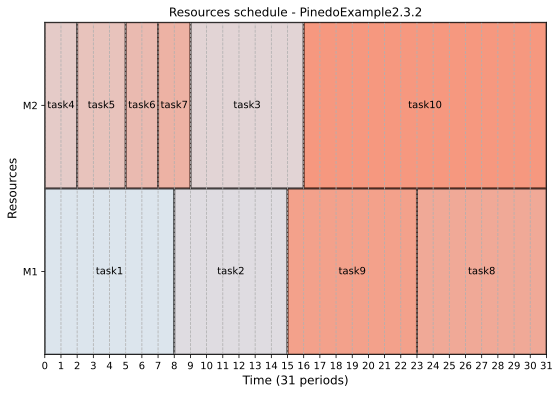

In [3]:
problem = ps.SchedulingProblem(name="PinedoExample2.3.2")

durations = [8, 7, 7, 2, 3, 2, 2, 8, 8, 15]
jobs = []

i = 1
for pj in durations:
    jobs.append(ps.FixedDurationTask(name=f"task{i}", duration=pj))
    i += 1

# two machines
machine_1 = ps.Worker(name="M1")
machine_2 = ps.Worker(name="M2")

# resource assignment: each job can be processed eithe by machine_1
# or machine_2
for j in jobs:
    j.add_required_resource(ps.SelectWorkers(list_of_workers=[machine_1, machine_2]))

# precedences
precs_graph = [
    (1, 2),
    (1, 3),
    (2, 10),
    (3, 10),
    (5, 3),
    (4, 5),
    (4, 6),
    (5, 8),
    (6, 7),
    (7, 9),
    (5, 9),
    (7, 8),
]

for i, j in precs_graph:
    ps.TaskPrecedence(task_before=jobs[i - 1], task_after=jobs[j - 1])

# non delay schedule
ps.ResourceNonDelay(resource=machine_1)
ps.ResourceNonDelay(resource=machine_2)

ps.ObjectiveMinimizeMakespan()
solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

The obtained schedule is shown below:

![Pinedo232PSGanttSol1](img/pinedo_example_232_solution_1.svg){ width="100%" }

This result is similar to the solution presented in the book, with a makespan of 31.

![Pinedo232PSGanttFromBook](img/gantta_pinedo_232.png){ width="100%" }

Now, let's reduce each of the ten processing times by one time unit:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 43 elapsed time:0.521s

Checking better value < 43

Found value: 42 elapsed time:1.191s

Checking better value < 42

Found value: 41 elapsed time:1.199s

Checking better value < 41

Found value: 40 elapsed time:1.206s

Checking better value < 40

Found value: 39 elapsed time:1.214s

Checking better value < 39

Found value: 38 elapsed time:1.222s

Checking better value < 38

Found value: 37 elapsed time:1.229s

Checking better value < 37

Found value: 36 elapsed time:1.237s

Checking better value < 36

Found value: 35 elapsed time:1.244s

Checking better value < 35

Found value: 34 elapsed time:1.290s

Checking better value < 34

Found value: 33 elapsed time:1.380s

Checking better value < 33

Found value: 32 elapsed time:1.387s

Checking better value < 32

Found value: 31 elapsed time:1.394s

Checking better value < 31

Found value: 30 elapsed time:1.401s

Checking better value < 30

Found value: 29 elapsed time:1.413s

Checking better value < 29

Found value: 28 elapsed time:1.565s

Checking better value < 28

Found value: 27 elapsed time:1.585s

Checking better value < 27

Can't find a better solution for problem PinedoExample2.3.2ReducedProcessingTimes.

Found optimum 27. Stopping iteration.

total number of iterations: 18

value: 27

PinedoExample2.3.2ReducedProcessingTimes satisfiability checked in 1.59s

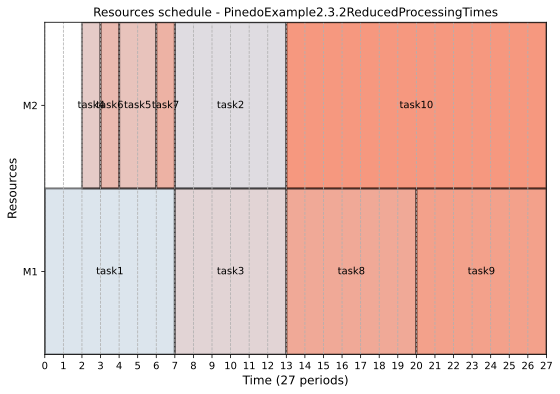

In [4]:
problem = ps.SchedulingProblem(name="PinedoExample2.3.2ReducedProcessingTimes")

durations = [7, 6, 6, 1, 2, 1, 1, 7, 7, 14]

jobs = []

i = 1
for pj in durations:
    jobs.append(ps.FixedDurationTask(name=f"task{i}", duration=pj))
    i += 1

# two machines
machine_1 = ps.Worker(name="M1")
machine_2 = ps.Worker(name="M2")

# resource assignment: each job can be processed eithe by machine_1
# or machine_2
for j in jobs:
    j.add_required_resource(ps.SelectWorkers(list_of_workers=[machine_1, machine_2]))

# precedences
precs_graph = [
    (1, 2),
    (1, 3),
    (2, 10),
    (3, 10),
    (5, 3),
    (4, 5),
    (4, 6),
    (5, 8),
    (6, 7),
    (7, 9),
    (5, 9),
    (7, 8),
]

for i, j in precs_graph:
    ps.TaskPrecedence(task_before=jobs[i - 1], task_after=jobs[j - 1])

# non delay schedule
ps.ResourceNonDelay(resource=machine_1)
ps.ResourceNonDelay(resource=machine_2)

ps.ObjectiveMinimizeMakespan()
solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

We solve the problem in the same way and obtain the following schedule:
![Pinedo232PSGanttSol2](img/pinedo_example_232_solution_2.svg){ width="100%" }

Here the conclusion is sligthly different from the one from Pinedo's book, where "one would expect that, if each one of the ten processing times is reduced by one time unit, the makespan would be less than 31. However, requiring the schedule to be non-delay results in the schedule depicted in [..] with a makespan of 32". Our solution, however, has a makespan of 27.

With 3 machines and the original settings, we get the following schedule:

![Pinedo232PSGanttSol3](img/pinedo_example_232_solution_3.svg){ width="100%" }

This also conflicts with Pinedo's conclusion, as he claims the makespan is now 36, whereas our solution results in a makespan of only 30.

## Example 3.2.5 (Minimizing Maximum Lateness)

Consider the following 4 jobs.

| jobs | $p_j$ | $r_j$ | $d_j$ |
| ---- | -- | -- | -- |
| 1    | 4  | 0  | 8 |
| 2    | 2  | 1  | 12 |
| 3    | 6  | 3  | 11 |
| 4    | 5  | 5  | 10 |

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 8 elapsed time:0.012s

Checking better value < 8

Found value: 7 elapsed time:0.012s

Checking better value < 7

Found value: 6 elapsed time:0.013s

Checking better value < 6

Found value: 5 elapsed time:0.014s

Checking better value < 5

Can't find a better solution for problem PinedoExample3.2.5.

Found optimum 5. Stopping iteration.

total number of iterations: 5

value: 5

PinedoExample3.2.5 satisfiability checked in 0.01s

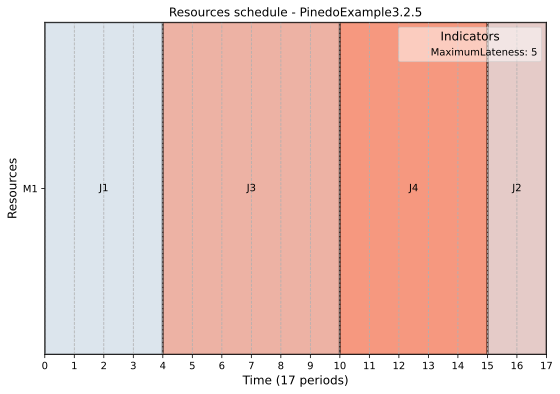

In [5]:
problem = ps.SchedulingProblem(name="PinedoExample3.2.5")

J1 = ps.FixedDurationTask(
    name="J1", duration=4, release_date=0, due_date=8, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", duration=2, release_date=1, due_date=12, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=6, release_date=3, due_date=11, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=5, release_date=5, due_date=10, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")
J1.add_required_resource(M1)
J2.add_required_resource(M1)
J3.add_required_resource(M1)
J4.add_required_resource(M1)

lateness_indicator = ps.IndicatorMaximumLateness()
ps.ObjectiveMinimizeIndicator(target=lateness_indicator, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

After solving, this gives the following Gantt chart, confirming "that schedule 1, 3, 4, 2 has to be optimal".

![Pinedo325PSGanttSol](img/pinedo_3_2_5_gantt_solution.svg){ width="100%" }

## Example 3.3.3 (Minimizing Number of Tardy Jobs)

Consider the following 5 jobs.

| jobs | $p_j$ | $d_j$ |
| ---- | -- | -- |
| 1    | 7  | 9  |
| 2    | 8  | 17 |
| 3    | 4  | 18 |
| 4    | 6  | 19 |
| 5    | 6  | 21 |

The implementation in Python is as follows:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 3 elapsed time:0.012s

Checking better value < 3

Found value: 2 elapsed time:0.013s

Checking better value < 2

Can't find a better solution for problem PinedoExample3.3.3.

Found optimum 2. Stopping iteration.

total number of iterations: 3

value: 2

PinedoExample3.3.3 satisfiability checked in 0.01s

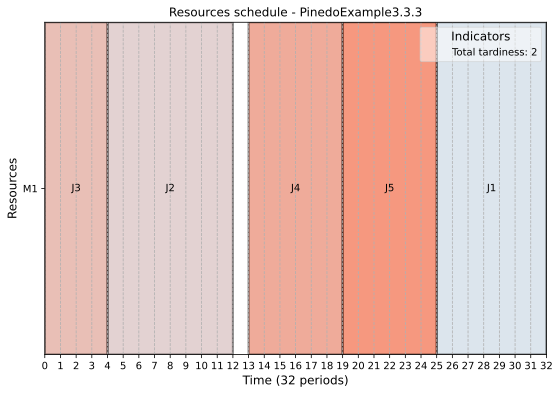

In [6]:
problem = ps.SchedulingProblem(name="PinedoExample3.3.3")

J1 = ps.FixedDurationTask(name="J1", duration=7, due_date=9, due_date_is_deadline=False)
J2 = ps.FixedDurationTask(
    name="J2", duration=8, due_date=17, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=4, due_date=18, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=6, due_date=19, due_date_is_deadline=False
)
J5 = ps.FixedDurationTask(
    name="J5", duration=6, due_date=21, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5]:
    j.add_required_resource(M1)

ind = ps.IndicatorNumberOfTardyTasks()
ps.ObjectiveMinimizeIndicator(target=ind, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

The resulting schedule

![Pinedo333PSGanttSol](img/pinedo_example_3_3_3_gantt_solution.svg){ width="100%" }


confirms that "The optimal schedule is 3, 4, 5, 1, 2 with $\sum{U_j = 2}$" and "Note also that there may be many optimal schedules".

## Example 3.4.5 (Minimizing Total Tardiness)

Consider the following 5 jobs.

| jobs | $p_j$ | $d_j$ |
| ---- | -- | -- |
| 1    |121  | 260  |
| 2    | 79  | 266 |
| 3    | 147  | 266 |
| 4    | 83  | 336 |
| 5    | 130  | 337 |

According to Pinedo, the optimal is "370. Two optimal sequences are 1, 2, 4, 5, 3 and 2, 1, 4, 5, 3", confirmed by the following simulation:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 523 elapsed time:0.011s

Checking better value < 523

Found value: 441 elapsed time:0.013s

Checking better value < 441

Found value: 440 elapsed time:0.016s

Checking better value < 440

Found value: 439 elapsed time:0.017s

Checking better value < 439

Found value: 438 elapsed time:0.018s

Checking better value < 438

Found value: 437 elapsed time:0.018s

Checking better value < 437

Found value: 436 elapsed time:0.019s

Checking better value < 436

Found value: 435 elapsed time:0.020s

Checking better value < 435

Found value: 410 elapsed time:0.022s

Checking better value < 410

Found value: 406 elapsed time:0.023s

Checking better value < 406

Found value: 405 elapsed time:0.025s

Checking better value < 405

Found value: 404 elapsed time:0.026s

Checking better value < 404

Found value: 403 elapsed time:0.026s

Checking better value < 403

Found value: 402 elapsed time:0.027s

Checking better value < 402

Found value: 401 elapsed time:0.027s

Checking better value < 401

Found value: 400 elapsed time:0.028s

Checking better value < 400

Found value: 399 elapsed time:0.028s

Checking better value < 399

Found value: 398 elapsed time:0.029s

Checking better value < 398

Found value: 397 elapsed time:0.031s

Checking better value < 397

Found value: 396 elapsed time:0.031s

Checking better value < 396

Found value: 395 elapsed time:0.032s

Checking better value < 395

Found value: 394 elapsed time:0.033s

Checking better value < 394

Found value: 393 elapsed time:0.033s

Checking better value < 393

Found value: 392 elapsed time:0.034s

Checking better value < 392

Found value: 391 elapsed time:0.035s

Checking better value < 391

Found value: 390 elapsed time:0.036s

Checking better value < 390

Found value: 389 elapsed time:0.036s

Checking better value < 389

Found value: 388 elapsed time:0.037s

Checking better value < 388

Found value: 385 elapsed time:0.037s

Checking better value < 385

Found value: 383 elapsed time:0.038s

Checking better value < 383

Found value: 381 elapsed time:0.038s

Checking better value < 381

Found value: 379 elapsed time:0.039s

Checking better value < 379

Found value: 377 elapsed time:0.039s

Checking better value < 377

Found value: 375 elapsed time:0.039s

Checking better value < 375

Found value: 373 elapsed time:0.040s

Checking better value < 373

Found value: 371 elapsed time:0.040s

Checking better value < 371

Found value: 370 elapsed time:0.041s

Checking better value < 370

Can't find a better solution for problem PinedoExample3.4.5.

Found optimum 370. Stopping iteration.

total number of iterations: 38

value: 370

PinedoExample3.4.5 satisfiability checked in 0.04s

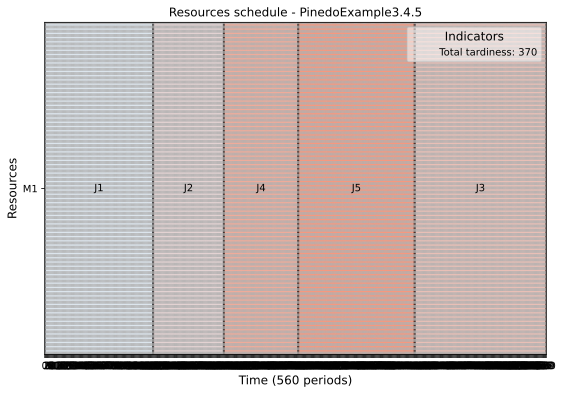

In [7]:
problem = ps.SchedulingProblem(name="PinedoExample3.4.5")

J1 = ps.FixedDurationTask(
    name="J1", duration=121, due_date=260, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", duration=79, due_date=266, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=147, due_date=266, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=83, due_date=336, due_date_is_deadline=False
)
J5 = ps.FixedDurationTask(
    name="J5", duration=130, due_date=337, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5]:
    j.add_required_resource(M1)

ind = ps.IndicatorTardiness()
ps.ObjectiveMinimizeIndicator(target=ind, weight=1)

solver = ps.SchedulingSolver(problem=problem, debug=False)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

![Pinedo345PSGanttSol](img/pinedo_example_3_4_5_gantt_solution.svg){ width="100%" }

## Example 3.6.3 (Minimizing Total Weighted Tardiness)

Consider the following 4 jobs.

| jobs | $w_j$ | $p_j$ | $d_j$ |
| ---- | -- | -- |---
| 1    |4 | 12  | 16  |
| 2    | 5  | 8 | 26 |
| 3    | 3  | 15 | 25 |
| 4    | 5  | 9 | 27 |

Pinedo states that "It turns out that the best schedule reachable from this node is 1, 2, 4, 3 with an objective value of 64."

However, our simulation gives a different result (the total weighted tardiness is 67):

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 161 elapsed time:0.008s

Checking better value < 161

Found value: 133 elapsed time:0.008s

Checking better value < 133

Found value: 132 elapsed time:0.009s

Checking better value < 132

Found value: 131 elapsed time:0.009s

Checking better value < 131

Found value: 130 elapsed time:0.010s

Checking better value < 130

Found value: 129 elapsed time:0.011s

Checking better value < 129

Found value: 128 elapsed time:0.011s

Checking better value < 128

Found value: 127 elapsed time:0.012s

Checking better value < 127

Found value: 126 elapsed time:0.012s

Checking better value < 126

Found value: 125 elapsed time:0.013s

Checking better value < 125

Found value: 124 elapsed time:0.013s

Checking better value < 124

Found value: 123 elapsed time:0.014s

Checking better value < 123

Found value: 116 elapsed time:0.015s

Checking better value < 116

Found value: 109 elapsed time:0.015s

Checking better value < 109

Found value: 92 elapsed time:0.016s

Checking better value < 92

Found value: 91 elapsed time:0.018s

Checking better value < 91

Found value: 90 elapsed time:0.019s

Checking better value < 90

Found value: 89 elapsed time:0.019s

Checking better value < 89

Found value: 88 elapsed time:0.020s

Checking better value < 88

Found value: 87 elapsed time:0.020s

Checking better value < 87

Found value: 86 elapsed time:0.021s

Checking better value < 86

Found value: 83 elapsed time:0.021s

Checking better value < 83

Found value: 80 elapsed time:0.022s

Checking better value < 80

Found value: 72 elapsed time:0.022s

Checking better value < 72

Found value: 67 elapsed time:0.024s

Checking better value < 67

Can't find a better solution for problem PinedoExample3.6.3.

Found optimum 67. Stopping iteration.

total number of iterations: 26

value: 67

PinedoExample3.6.3 satisfiability checked in 0.02s

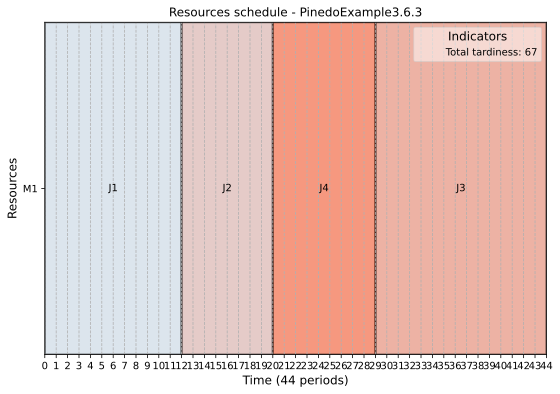

In [8]:
problem = ps.SchedulingProblem(name="PinedoExample3.6.3")
J1 = ps.FixedDurationTask(
    name="J1", priority=4, duration=12, due_date=16, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", priority=5, duration=8, due_date=26, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", priority=3, duration=15, due_date=25, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", priority=5, duration=9, due_date=27, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4]:
    j.add_required_resource(M1)

ind = ps.IndicatorTardiness()
ps.ObjectiveMinimizeIndicator(target=ind, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

## Example 4.1.5 (Minimizing Total Earliness and Tardiness with Tight Due Date)

Consider the following example with 6 jobs and due date $d = 180$.

| jobs | $p_j$ |
| ---- | -- |
| 1    |106 |
| 2    | 100 |
| 3    |96  | 
| 4    | 22  | 
| 5    | 20  |
| 6    | 2  |

The following script optimized minimizing both total earliness and tardiness:

Solver type:
===========

-> Standard SAT/SMT solver

Objectives:
        ======

MinimizeTotal tardiness

MinimizeTotal earliness

MinimizeEquivalentObjective

Incremental optimizer:
======================

Found value: 440 elapsed time:0.007s

Checking better value < 440

Found value: 439 elapsed time:0.008s

Checking better value < 439

Found value: 438 elapsed time:0.008s

Checking better value < 438

Found value: 437 elapsed time:0.009s

Checking better value < 437

Found value: 436 elapsed time:0.010s

Checking better value < 436

Found value: 435 elapsed time:0.011s

Checking better value < 435

Found value: 434 elapsed time:0.012s

Checking better value < 434

Found value: 433 elapsed time:0.013s

Checking better value < 433

Found value: 432 elapsed time:0.014s

Checking better value < 432

Found value: 431 elapsed time:0.015s

Checking better value < 431

Found value: 430 elapsed time:0.016s

Checking better value < 430

Found value: 429 elapsed time:0.017s

Checking better value < 429

Found value: 428 elapsed time:0.017s

Checking better value < 428

Found value: 427 elapsed time:0.018s

Checking better value < 427

Found value: 426 elapsed time:0.019s

Checking better value < 426

Found value: 425 elapsed time:0.020s

Checking better value < 425

Found value: 424 elapsed time:0.021s

Checking better value < 424

Found value: 423 elapsed time:0.022s

Checking better value < 423

Found value: 422 elapsed time:0.023s

Checking better value < 422

Found value: 421 elapsed time:0.024s

Checking better value < 421

Found value: 420 elapsed time:0.025s

Checking better value < 420

Found value: 419 elapsed time:0.026s

Checking better value < 419

Found value: 418 elapsed time:0.027s

Checking better value < 418

Found value: 417 elapsed time:0.027s

Checking better value < 417

Found value: 416 elapsed time:0.028s

Checking better value < 416

Found value: 415 elapsed time:0.029s

Checking better value < 415

Found value: 414 elapsed time:0.030s

Checking better value < 414

Found value: 413 elapsed time:0.030s

Checking better value < 413

Found value: 412 elapsed time:0.031s

Checking better value < 412

Found value: 411 elapsed time:0.031s

Checking better value < 411

Found value: 410 elapsed time:0.032s

Checking better value < 410

Found value: 409 elapsed time:0.032s

Checking better value < 409

Found value: 408 elapsed time:0.033s

Checking better value < 408

Found value: 407 elapsed time:0.034s

Checking better value < 407

Found value: 406 elapsed time:0.035s

Checking better value < 406

Found value: 405 elapsed time:0.035s

Checking better value < 405

Found value: 404 elapsed time:0.036s

Checking better value < 404

Found value: 403 elapsed time:0.037s

Checking better value < 403

Found value: 402 elapsed time:0.037s

Checking better value < 402

Found value: 401 elapsed time:0.038s

Checking better value < 401

Found value: 400 elapsed time:0.038s

Checking better value < 400

Found value: 399 elapsed time:0.039s

Checking better value < 399

Found value: 398 elapsed time:0.039s

Checking better value < 398

Found value: 397 elapsed time:0.040s

Checking better value < 397

Found value: 396 elapsed time:0.040s

Checking better value < 396

Found value: 395 elapsed time:0.042s

Checking better value < 395

Found value: 394 elapsed time:0.042s

Checking better value < 394

Found value: 393 elapsed time:0.043s

Checking better value < 393

Found value: 392 elapsed time:0.043s

Checking better value < 392

Found value: 391 elapsed time:0.044s

Checking better value < 391

Found value: 390 elapsed time:0.044s

Checking better value < 390

Found value: 389 elapsed time:0.045s

Checking better value < 389

Found value: 388 elapsed time:0.046s

Checking better value < 388

Found value: 387 elapsed time:0.046s

Checking better value < 387

Found value: 386 elapsed time:0.047s

Checking better value < 386

Found value: 385 elapsed time:0.048s

Checking better value < 385

Found value: 384 elapsed time:0.048s

Checking better value < 384

Found value: 383 elapsed time:0.049s

Checking better value < 383

Found value: 382 elapsed time:0.049s

Checking better value < 382

Found value: 381 elapsed time:0.050s

Checking better value < 381

Found value: 380 elapsed time:0.051s

Checking better value < 380

Found value: 376 elapsed time:0.052s

Checking better value < 376

Found value: 370 elapsed time:0.060s

Checking better value < 370

Found value: 366 elapsed time:0.061s

Checking better value < 366

Found value: 364 elapsed time:0.064s

Checking better value < 364

Found value: 362 elapsed time:0.074s

Checking better value < 362

Found value: 361 elapsed time:0.075s

Checking better value < 361

Found value: 360 elapsed time:0.075s

Checking better value < 360

Can't find a better solution for problem PinedoExample4.1.5.

Found optimum 360. Stopping iteration.

total number of iterations: 69

value: 360

PinedoExample4.1.5 satisfiability checked in 0.08s

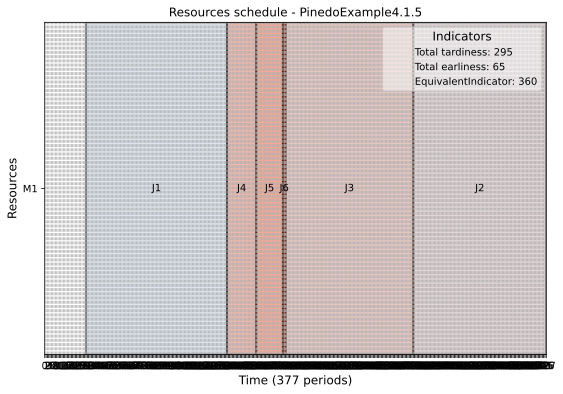

In [9]:
problem = ps.SchedulingProblem(name="PinedoExample4.1.5")

J1 = ps.FixedDurationTask(
    name="J1", duration=106, due_date=180, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", duration=100, due_date=180, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=96, due_date=180, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=22, due_date=180, due_date_is_deadline=False
)
J5 = ps.FixedDurationTask(
    name="J5", duration=20, due_date=180, due_date_is_deadline=False
)
J6 = ps.FixedDurationTask(
    name="J6", duration=2, due_date=180, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5, J6]:
    j.add_required_resource(M1)

total_tardiness = ps.IndicatorTardiness()
total_earliness = ps.IndicatorEarliness()

ob1 = ps.ObjectiveMinimizeIndicator(target=total_tardiness, weight=1)
ob2 = ps.ObjectiveMinimizeIndicator(target=total_earliness, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
solution.to_df()
ps.render_gantt_matplotlib(solution)

## Example 4.2.3 (Minimizing the Total Completion Time with Deadlines)

In this example, we have a set of 5 jobs with their respective processing times and due dates:

| jobs | $p_j$ | $d_j$ |
| ---- | -- | -- |
| 1    |4  | 10  |
| 2    | 6  | 12 |
| 3    | 2  | 14 |
| 4    | 4  | 18 |
| 5    | 2  | 18 |

To minimize the total completion time, we can use the following Python script:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 62 elapsed time:0.009s

Checking better value < 62

Found value: 60 elapsed time:0.010s

Checking better value < 60

Found value: 56 elapsed time:0.010s

Checking better value < 56

Found value: 54 elapsed time:0.011s

Checking better value < 54

Found value: 52 elapsed time:0.011s

Checking better value < 52

Can't find a better solution for problem MultipleObjectiveLatenessTardiness.

Found optimum 52. Stopping iteration.

total number of iterations: 6

value: 52

MultipleObjectiveLatenessTardiness satisfiability checked in 0.01s

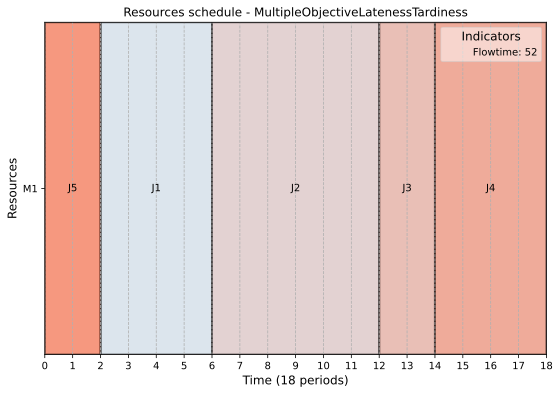

In [10]:
import processscheduler as ps

# Example 4.1.5 of the Pinedo book. The solution is expected to be:
# 1,3,6,5,4,2

problem = ps.SchedulingProblem(name="MultipleObjectiveLatenessTardiness")

J1 = ps.FixedDurationTask(name="J1", duration=4, due_date=10)
J2 = ps.FixedDurationTask(name="J2", duration=6, due_date=12, due_date_is_deadline=True)
J3 = ps.FixedDurationTask(name="J3", duration=2, due_date=14, due_date_is_deadline=True)
J4 = ps.FixedDurationTask(name="J4", duration=4, due_date=18, due_date_is_deadline=True)
J5 = ps.FixedDurationTask(name="J5", duration=2, due_date=18, due_date_is_deadline=True)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5]:
    j.add_required_resource(M1)

ps.ObjectiveMinimizeFlowtime()

solver = ps.SchedulingSolver(problem=problem)
solution_1 = solver.solve()
ps.render_gantt_matplotlib(solution_1)

The statement "Proceeding in this manner yields two optimal schedules, namely schedules 5, 1, 2, 3, 4 and 3, 1, 2, 5, 4." is confirmed.

## Example 6.1.1 (Flow Shops with Unlimited Intermediate Storage)

Consider 5 jobs on 4 machines with the processing times presented in the table below.

| jobs | $j_1$ | $j_2$ |$j_3$ |$j_4$ |$j_5$ |
| ---- | -- | -- | -- | -- | -- |
| $p_{1,j_k}$ | 5  | 5 | 3 | 6 | 3 |
| $p_{2,j_k}$ | 4  | 4 | 2 | 4 | 4 |
| $p_{3,j_k}$ | 4  | 4 | 3 | 4 | 1 |
| $p_{4,j_k}$ | 3  | 6 | 3 | 2 | 5 |

We solve this problem using the following Python script:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 60 elapsed time:0.015s

Checking better value < 60

Found value: 59 elapsed time:0.018s

Checking better value < 59

Found value: 58 elapsed time:0.020s

Checking better value < 58

Found value: 57 elapsed time:0.021s

Checking better value < 57

Found value: 56 elapsed time:0.022s

Checking better value < 56

Found value: 55 elapsed time:0.023s

Checking better value < 55

Found value: 54 elapsed time:0.024s

Checking better value < 54

Found value: 53 elapsed time:0.025s

Checking better value < 53

Found value: 52 elapsed time:0.026s

Checking better value < 52

Found value: 51 elapsed time:0.026s

Checking better value < 51

Found value: 50 elapsed time:0.027s

Checking better value < 50

Found value: 49 elapsed time:0.028s

Checking better value < 49

Found value: 48 elapsed time:0.034s

Checking better value < 48

Found value: 47 elapsed time:0.035s

Checking better value < 47

Found value: 46 elapsed time:0.036s

Checking better value < 46

Found value: 45 elapsed time:0.037s

Checking better value < 45

Found value: 44 elapsed time:0.038s

Checking better value < 44

Found value: 43 elapsed time:0.040s

Checking better value < 43

Found value: 42 elapsed time:0.042s

Checking better value < 42

Found value: 41 elapsed time:0.042s

Checking better value < 41

Found value: 40 elapsed time:0.044s

Checking better value < 40

Found value: 39 elapsed time:0.045s

Checking better value < 39

Found value: 38 elapsed time:0.048s

Checking better value < 38

Found value: 37 elapsed time:0.049s

Checking better value < 37

Found value: 36 elapsed time:0.051s

Checking better value < 36

Found value: 35 elapsed time:0.055s

Checking better value < 35

Found value: 34 elapsed time:0.056s

Checking better value < 34

Found value: 33 elapsed time:0.064s

Checking better value < 33

Found value: 32 elapsed time:0.067s

Checking better value < 32

Can't find a better solution for problem Pinedo6.1.1.

Found optimum 32. Stopping iteration.

total number of iterations: 30

value: 32

Pinedo6.1.1 satisfiability checked in 0.07s

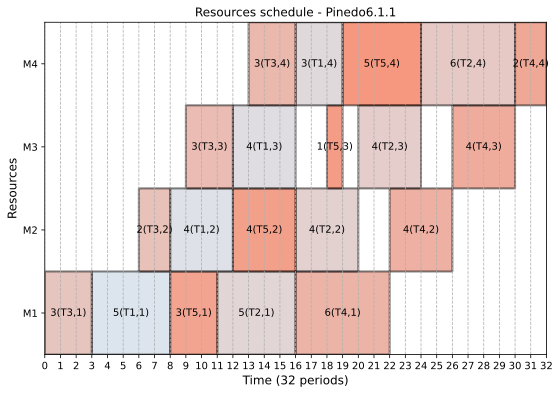

In [11]:
pb = ps.SchedulingProblem(name="Pinedo6.1.1")
durations = [[5, 4, 4, 3], [5, 4, 4, 6], [3, 2, 3, 3], [6, 4, 4, 2], [3, 4, 1, 5]]


# create machines
M1 = ps.Worker(name="M1")
M2 = ps.Worker(name="M2")
M3 = ps.Worker(name="M3")
M4 = ps.Worker(name="M4")

machines = [M1, M2, M3, M4]

# create tasks
job_number = 1
for job_number in range(5):
    j = 0
    tasks_for_this_job = []
    for d in durations[job_number]:
        t = ps.FixedDurationTask(name=f"{d}(T{job_number+1},{j+1})", duration=d)
        t.add_required_resource(machines[j])
        tasks_for_this_job.append(t)
        j += 1
    # and precedence
    for i in range(len(tasks_for_this_job) - 1):
        ps.TaskPrecedence(
            task_before=tasks_for_this_job[i], task_after=tasks_for_this_job[i + 1]
        )

ps.ObjectiveMinimizeMakespan()
solver = ps.SchedulingSolver(problem=pb)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

The resulting Gantt chart displays the optimal sequence, which is 5, 3, 1, 2, 4, with a makespan of 32:

![Pinedo611PSGanttSol](img/pinedo_6_1_1_gantt_solution.svg){ width="100%" }

This has to be be compared to the statement from Pinedo, p.161, where "the two sequences suggested by the heuristic are therefore 2, 5, 3, 1, 4 and 5, 2, 3, 1, 4. The makespan under both these sequences is 32. Complete enumeration veriﬁes that both sequences are optimal." We should verify that the Pinedo's sequence is actually a solution found by ProcessScheduler. This can be achived by adding a constraint to ensure that job 2 is prior to job 1.